# Exercise 8 - CTD data from Büsum

**Aim:** To load the CTD data from the Seepraktikum

**Data:** `*.cnv` files from Büsum, from the Seepraktikum 2024

**Directions:** Answer the questions, create an `*.ipynb` and 5 figures.  

**Measure of success:** Some plots of temperature and salinity, ideally with tidal phase and location notes.

<hr>

## Create a notebook

Create an `*.ipynb` containing the commands for this assignment, or copy this file.  

```{admonition} File naming convention
Name your python notebook something useful `ex<X>-<slug>-<Lastname>-seaocn.ipynb` where you replace `<X>` with the exercise number and `<slug>` with the short slug to name the topic, and `<Lastname>` with your last name.

Figures should be named something like `ex<X>fig<Y>-<Lastname>-<slug>-seaocn.png` where you replace `<X>` with the exercise number, `<Y>` with the figure number, and `<Lastname>` with your last name.

```

### Import necessary packages.  

For example, `matplotlib` and `pandas` and `numpy` and `xarray`.  You may also need
```
import matplotlib.pyplot as plt
import pandas as pd
import gsw 
import numpy as np
import xarray as xr
from datetime import datetime
```

Here you have two options (there may be more) for working with `*.cnv` files.  They are `pycnv` and `seabird`, as
- [pycnv (link)](https://pypi.org/project/pycnv/)
- [seabird (link)](https://github.com/castelao/seabird)

You may try either of these.  Note that `pycnv` will create its own data type which you will need to conver to `xarray`.  `seabird` can be used to create a netCDF file (`*.nc`) which is a format that `xarray` can handle.

Both of these packages are designed to run on `*.cnv` files.  Normally, the data will first need to be converted from `*.hex` to `*.cnv` using the Seabird processing.  There is a "wrapper" written to call Seabird processing from within python, but it does require the Seabird software to already be installed on the computer (therefore the computer needs to be running Windows).  See [Seabird-processing (link)](https://github.com/HakaiInstitute/seabird-processing).

If you are missing any of the packages that you decide you need, please refer to [Resources: Python](../resource/python).

For processing directly from `*.hex`, there is some python code available [here](https://github.com/jklymak/SeaCat/tree/master/python) by Jody Klymak.  It was written for a specific set of SeaCat files, and so may not be generalised to all the possible (especially header) formats for Seabird instruments.


In [113]:
# Importing required packages here
import matplotlib.pyplot as plt
import numpy as np
from seabird.cnv import fCNV
from seabird.netcdf import cnv2nc
import gsw
import xarray as xr
import os
import glob
from datetime import datetime
import matplotlib.dates as mdates
from matplotlib.patches import Rectangle
import re # to search strings


<hr>

# Convert to netCDF and load with `xarray`

- First, on your computer (after installing the [seabird (link)](https://github.com/castelao/seabird) package, run it on one `*.cnv` file to create a `*.nc` file.

  ```
  seabird cnv2nc MSM121_054_1db.cnv
  ```
  
- `xarray` is a python package commonly used for ocean and climate science.  While you could continue working with the `pycnv` format, it will become a hindrance later.

```{seealso}
Read the docs: [xarray.DataArray](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.html)
```

```{admonition} Alternative
You can instead convert your `pycnv` format data into an `xarray` dataArray, but I suspect this may be slightly more complicated.
```


In [91]:
# Load your *.nc file
#profile = fCNV('your_file.cnv')
file_path = '../data/ctd_cnv/'
out_dir = '../data/ctd_nc/'
ctd_files = os.listdir(file_path)

ctd_files = sorted(glob.glob(file_path + '*cnv'))

if 0:
    for ii in ctd_files:
        output_path_netcdf = out_dir + ii[0:-4] + '.nc'
        ds = fCNV(file_path + ii)
        cnv2nc(ds, output_path_netcdf)

## Work with data in xarray

Use the `print` command to see what is in your data array.  A data array is a bit like a file folder, with different variable types in it.


```{seealso}
The [xarray user guide (external)](https://docs.xarray.dev/en/stable/user-guide/index.html), especially for this lab on
- [Data structures](https://docs.xarray.dev/en/stable/user-guide/data-structures.html)
- [Indexing and selecting data](https://docs.xarray.dev/en/stable/user-guide/indexing.html)
```


In [145]:
# Print your data
file_path = '../data/ctd_nc/'
ctd_nc = sorted(glob.glob(file_path + '*nc'))

latstn = np.ones(len(ctd_nc),) * np.nan
lonstn = latstn.copy()
castnum = latstn.copy()
#time1 = np.empty((len(ctd_nc),), dtype=object)
mdates1 = lonstn.copy()
qdo=0
fnames = []

for ii in ctd_nc:
    ds = xr.open_dataset(ii)
    
    latstn[qdo] = ds.LATITUDE
    lonstn[qdo] = ds.LONGITUDE
    tmp1 = datetime.fromisoformat(ds.datetime)
    mdates1[qdo] = mdates.date2num(tmp1)
    cstart = re.search("Cast", ii).start()
    castnum[qdo] = int(ii[cstart+4:-3])

#    if qdo==0:
#        allctd = ds
#    else:
#        allctd = xr.concat([allctd, ds], "castnum", fill_value=np.nan)
           
    qdo+=1

ValueError: cannot reindex or align along dimension 'scan' because of conflicting dimension sizes: {218, 394}

In [ ]:
# Try to combine all the nc files
for ii in ctd_nc:
    ds = xr.open_dataset(ii)
    
    latstn[qdo] = ds.LATITUDE
    lonstn[qdo] = ds.LONGITUDE
    tmp1 = datetime.fromisoformat(ds.datetime)
    mdates1[qdo] = mdates.date2num(tmp1)
    cstart = re.search("Cast", ii).start()
    castnum[qdo] = int(ii[cstart+4:-3])

#    if qdo==0:
#        allctd = ds
#    else:
#        allctd = xr.concat([allctd, ds], "castnum", fill_value=np.nan)
           
    qdo+=1

## Calculate TEOS-10 parameters

- Calculate absolute salinity and conservative temperature

- Repeat for both primary and secondary channels




In [149]:
print(allctd)
print(ds)

<xarray.Dataset>
Dimensions:       (scan: 218)
Dimensions without coordinates: scan
Data variables:
    timeJ         (scan) float64 ...
    prdM          (scan) float64 ...
    tv290C        (scan) float64 ...
    c0mSPercm     (scan) float64 ...
    PSAL          (scan) float64 ...
    DEPTH         (scan) float64 ...
    oxsatMmPerKg  (scan) float64 ...
    oxsolMmPerKg  (scan) float64 ...
    turbWETntu0   (scan) float64 ...
    flECO-AFL     (scan) float64 ...
    flag          (scan) float64 ...
    timeS         (scan) float64 ...
Attributes: (12/14)
    history:          Created by cnv2nc (PyCNV)
    date_created:     2024-06-02T05:27:48.978126
    LATITUDE:         54.125
    LONGITUDE:        8.466666666666667
    bad_flag:         -9.990e-29
    datetime:         2024-05-21T09:29:47
    ...               ...
    instrument_type:  CTD
    md5:              4bf777d78a5c262ac68225f79df249fa
    nquan:            11
    nvalues:          218
    sbe_model:        19plus
    star

19870.000011574073
(array([60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76,
       77, 78, 79]),)
../data/ctd_nc/SBE19plus_01907321_2024_05_22_Cast11.nc
../data/ctd_nc/SBE19plus_01907321_2024_05_25_Cast50.nc
../data/ctd_nc/SBE19plus_01907321_2024_05_27_Cast69.nc
../data/ctd_nc/SBE19plus_01907321_2024_05_27_Cast70.nc
../data/ctd_nc/SBE19plus_01907321_2024_05_27_Cast71.nc
../data/ctd_nc/SBE19plus_01907321_2024_05_27_Cast72.nc
../data/ctd_nc/SBE19plus_01907321_2024_05_27_Cast73.nc
../data/ctd_nc/SBE19plus_01907321_2024_05_27_Cast74.nc
../data/ctd_nc/SBE19plus_01907321_2024_05_27_Cast75.nc
../data/ctd_nc/SBE19plus_01907321_2024_05_27_Cast76.nc
../data/ctd_nc/SBE19plus_01907321_2024_05_27_Cast77.nc
../data/ctd_nc/SBE19plus_01907321_2024_05_27_Cast78.nc
../data/ctd_nc/SBE19plus_01907321_2024_05_27_Cast79.nc
../data/ctd_nc/SBE19plus_01907321_2024_05_27_Cast80.nc
../data/ctd_nc/SBE19plus_01907321_2024_05_27_Cast81.nc
../data/ctd_nc/SBE19plus_01907321_2024_05_27_Cast82.nc
../

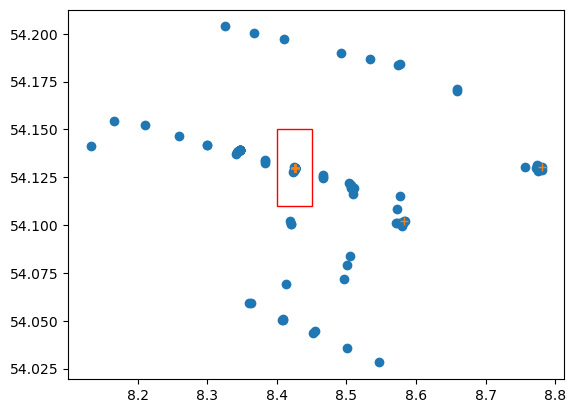

In [96]:
my_first_day = datetime.fromisoformat('2024-05-27T00:00:01')
my_first_mdate = mdates.date2num(my_first_day)
print(my_first_mdate)

itime = np.where((mdates1>my_first_mdate) & (mdates1<my_first_mdate+1) )
print(itime)

fig, ax = plt.subplots()
plt.plot(lonstn,latstn,'o')
plt.plot(lonstn[itime],latstn[itime],'+')

minlon = 8.4
maxlon = 8.45
minlat = 54.11
maxlat = 54.150
# Create a Rectangle patch & add to plot
rect = Rectangle((minlon, minlat), maxlon-minlon, maxlat-minlat, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

iloc = np.where((lonstn>minlon) & (lonstn<maxlon) & (latstn>minlat) & (latstn<maxlat))
iloc2 = iloc[0]

for ii in iloc2:
    print(ctd_nc[ii])

In [97]:
print(ctd_nc)

['../data/ctd_nc/SBE19plus_01907321_2024_05_21_Cast01.nc', '../data/ctd_nc/SBE19plus_01907321_2024_05_21_Cast02.nc', '../data/ctd_nc/SBE19plus_01907321_2024_05_21_Cast03.nc', '../data/ctd_nc/SBE19plus_01907321_2024_05_21_Cast04.nc', '../data/ctd_nc/SBE19plus_01907321_2024_05_21_Cast05.nc', '../data/ctd_nc/SBE19plus_01907321_2024_05_21_Cast06.nc', '../data/ctd_nc/SBE19plus_01907321_2024_05_22_Cast08.nc', '../data/ctd_nc/SBE19plus_01907321_2024_05_22_Cast09.nc', '../data/ctd_nc/SBE19plus_01907321_2024_05_22_Cast10.nc', '../data/ctd_nc/SBE19plus_01907321_2024_05_22_Cast11.nc', '../data/ctd_nc/SBE19plus_01907321_2024_05_22_Cast12.nc', '../data/ctd_nc/SBE19plus_01907321_2024_05_22_Cast13.nc', '../data/ctd_nc/SBE19plus_01907321_2024_05_22_Cast14.nc', '../data/ctd_nc/SBE19plus_01907321_2024_05_22_Cast17.nc', '../data/ctd_nc/SBE19plus_01907321_2024_05_22_Cast18.nc', '../data/ctd_nc/SBE19plus_01907321_2024_05_22_Cast19.nc', '../data/ctd_nc/SBE19plus_01907321_2024_05_23_Cast20.nc', '../data/ctd_

In [81]:
print(mdates1[iloc])
tmp=   mdates.num2date(mdates1[iloc])
#time_array_np = tmp.astype(np.datetime64)
#print(time_array_np)
a = np.array(tmp, dtype='datetime64')
print(a)

[19870.47969907 19870.36488426 19870.51982639 19870.40633102
 19871.5993287  19870.3958912  19870.48965278 19870.35423611
 19865.4483912  19870.42774306 19870.50005787 19870.38547454
 19870.45840278 19871.44238426 19870.37555556 19870.46923611
 19872.53190972 19870.41685185 19870.51027778 19870.3447338
 19870.44797454 19870.43771991 19868.3268287  19873.33982639]
['2024-05-27T11:30:46.000000' '2024-05-27T08:45:26.000000'
 '2024-05-27T12:28:33.000000' '2024-05-27T09:45:07.000000'
 '2024-05-28T14:23:02.000000' '2024-05-27T09:30:05.000000'
 '2024-05-27T11:45:06.000000' '2024-05-27T08:30:06.000000'
 '2024-05-22T10:45:41.000000' '2024-05-27T10:15:57.000000'
 '2024-05-27T12:00:05.000000' '2024-05-27T09:15:05.000000'
 '2024-05-27T11:00:06.000000' '2024-05-28T10:37:02.000000'
 '2024-05-27T09:00:48.000000' '2024-05-27T11:15:42.000000'
 '2024-05-29T12:45:57.000000' '2024-05-27T10:00:16.000000'
 '2024-05-27T12:14:48.000000' '2024-05-27T08:16:25.000000'
 '2024-05-27T10:45:05.000000' '2024-05-27T10

/var/folders/t1/z5bp59k95119nw35yqv699t40000gn/T/ipykernel_18450/2474042474.py:5: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  a = np.array(tmp, dtype='datetime64')


## Add these data to your xarray data array

- Name them 'SA' and 'CT' for absolute salinity and conservative temperature

- And 'SA2' and 'CT2' for secondary

```{seealso}
Some functions to get you started reading the `xarray` docs: https://docs.xarray.dev/en/latest/generated/xarray.Dataset.assign.html
```

In [8]:
# Add additional data fields


## Save an xr.da to *.netCDF file

Now that your data are in `xarray.DataArray` format, you can use tools within `xarray` to write a netCDF file.

```{seealso}
Function help for [xarray.Dataset.to_netcdf](https://docs.xarray.dev/en/latest/generated/xarray.Dataset.to_netcdf.html)
```

<hr>

## Fig 2. Repeat the profile plot

As above, but with the data in `xarray` format.  

Modify your plot:

1. Add grid lines

2. Limit the top of the plot to the surface (p=0)

3. Add a second plot for temperature, to the right of the salinity plot

4. Add a title to your figure, perhaps the station number, latitude and longitude

5. Export the figure using the figure naming convention, to the subfolder `figures/`.



In [9]:
# Plot the data

## Fig 3. Make a T-S diagram 

A T-S diagram has salinity on the x-axis and temperature on the y-axis, and contours of density (sigma_0) added.

Modify your plot by

1. Add contours of potential density
    - Hint, you will need to create a vector of temperature and salinity spanning at least the ranges in the profile
    - You will then need to use these gridded vectors to calculate potential density using the gsw toolbox

2. Add contour labels for the density

3. Add a title

4. Export the figure using the figure-naming convention, to the subfolder `figures/`

In [10]:
# Plot a T-S diagram

## Clean up the plots

Go back and clean up the plots if needed. This means, add a legend, axes labels, fix the time axis annotations if needed, and fix the fontsize to be legible even if the figure is small.

```{note}
In future exercises, you will be expected to clean up all plots without reminders.  All plots should have axes labelled (with units!), legible font size (bigger than you think) and appropriate axis ranges.  Legends should be used whenever more than one quantity is plotted.
```

- Re-export the figures with the same names as before.

<hr>

# Further calculations

## Calculate buoyancy frequency

Buoyancy frequency is a measure of how strongly a vertical profile is stratified.  It is calculated as
    
$$
N^2 = \partial b/\partial z
$$

where buoyancy $b$ is

$$
b(z) = -g\frac{\rho(z)}{\rho_0}
$$
and $g$ is gravitational acceleration, $\rho(z)$ the profile of density, and $\rho_0$ a background mean value of density.  (The exact value of $\rho_0$ doesn't matter much.  Something like 1023 or 1025 kg/m$^3$ will do fine.)

You can do this two ways.  

1. Calculate density using the Gibb's seawater toolbox [GSW density](https://teos-10.github.io/GSW-Python/density.html), and

2. Use the GSW function for buoyancy frequency under [GSW stability](https://teos-10.github.io/GSW-Python/stability.html).

## Fig 4. Plot buoyancy frequency

Try and plot both ways on the same axes.

```{note}
The convention in oceanography is that the N$^2$ axis is a log10 axis.  Do you have a noisy plot?  (Optional:) The way we calculate buoyancy frequency in practice is to use one of a few possible techniques to smooth the data. 
```

3. Export your figure.

In [11]:
# Calculate buoyancy frequency

In [12]:
# Plot buoyancy frequency

## Calculate dynamic height

Small variations in seawater density affect both ocean circulation and sea level.  According to the hydrostatic approximation, the vertical gradient of pressure is a function of density $\rho$ and gravitational acceleration $g$ as

$$
\frac{\partial p}{\partial z} = -\rho g
$$

if we want to integrate to find the height of the surface above a profile of given density, we can calculate

$$
h = \int_{p_r}^p\frac{dp}{-\rho g}
$$

which has units of meters.

Dynamic height is a similar quantity, but accounts for gravity already (has units of m$^2$/s$^s$ and is used in the geostrophic velocity/transport calculation.

```{seealso}
See dynamic height calculations in the [GSW toolbox](https://teos-10.github.io/GSW-Python/geostrophy.html)
```

## Fig 5. Plot dynamic height

1. Plot dynamic height against depth or pressure

2. In a separate plot in the same figure, convert dynamic height to steric height (units of m) and plot it.

3. Extra (optional): Calculate dynamic height manually by using the specific volume anomaly.

In [13]:
# Calculate dynamic height

In [14]:
# Calculate steric height

In [15]:
# Plot dynamic height + steric height